In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
%cd "/content" 

/content


In [ ]:
!sudo apt-get install p7zip-full

In [ ]:
!7z x archive.zip

#Dark Channel




```

I(x)=Observed hazy image
J(x)=haze-free image
β=scattering coefficient of the atmosphere
d=scene depth
e pow(− βd(x))=t(x)=transmission map

I(x)=J(x)t(x)+A(1−t(x))
```



In [ ]:
#definning dark channel function

def dark_channel(i,w): #takes input as i=input image shape=MxNx3, w=width of patch 
  row,column,_=i.shape
  pad_w=int(w/2)
  padded=np.pad(i,((pad_w,pad_w),(pad_w,pad_w),(0,0)),'edge') #applying padding for the corner value
  darkch=np.zeros((row,column))
  for i,j in np.ndindex(darkch.shape):
    darkch[i,j]=np.min(padded[i:i+w,j:j+w,:])
  return darkch

(400, 600, 3)

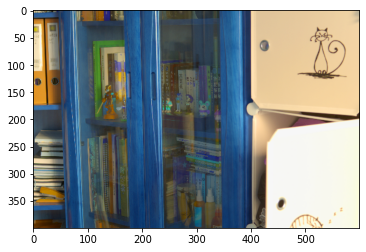

In [ ]:
Im=cv2.imread("1.png",1)
plt.imshow(Im)
Im.shape

In [ ]:
darkch=dark_channel(Im,15) #using patch size of 15

Text(0.5, 1.0, 'Dark_Channel')

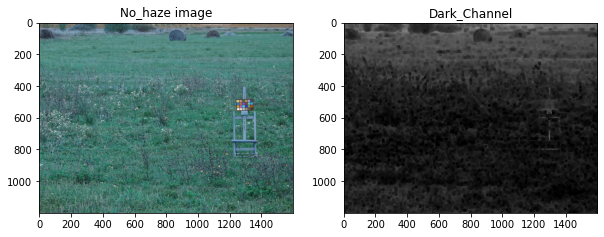

In [ ]:
fig=plt.figure(figsize=(10,7))
row,column=1,2

fig.add_subplot(row,column,1)
plt.imshow(Im)
plt.title('No_haze image')


fig.add_subplot(row,column,2)
plt.imshow(darkch)
plt.gray()
plt.title('Dark_Channel')



In [ ]:
Im=cv2.imread("GT/03_GT.png",1)


In [ ]:
darkch=dark_channel(Im,20) #using patch size of 20

Text(0.5, 1.0, 'Dark_Channel')

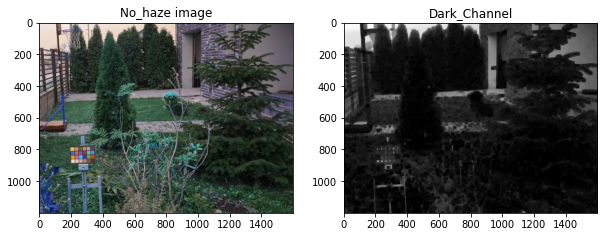

In [ ]:
fig=plt.figure(figsize=(10,7))
row,column=1,2

fig.add_subplot(row,column,1)
plt.imshow(Im)
plt.title('No_haze image')


fig.add_subplot(row,column,2)
plt.imshow(darkch)
plt.gray()
plt.title('Dark_Channel')

#dark channel prior using erosion

In [9]:
import tensorflow as tf

In [ ]:
def dark_channel(img,size):
  img_raw=tf.io.read_file(img)
  img=tf.image.decode_png(img_raw,channels=3)
  img_c=tf.image.convert_image_dtype(img,tf.float32)

  img=tf.math.reduce_min(img_c,axis=-1,keepdims=True) #finds min and convert img to img_hximg_w
  
  #img=tf.stack([img,img,img],axis=-1) #converting to 3 dimensional
  
  img=tf.expand_dims(img,axis=0) # converting to 4 dimensional

  kernel=tf.zeros((size,size,1),tf.float32)
  output4D = tf.nn.erosion2d(img, filters=kernel, strides=(1,1,1,1),data_format='NHWC', dilations=(1,1,1,1),padding="SAME")
  print(output4D.shape)
  
  return output4D,img_c

In [ ]:
img_high="179_high.png"
img_low="179_low.png"
dcp_high,img_h=dark_channel(img_high,15)
dcp_low,img_l=dark_channel(img_low,15)


(1, 400, 600, 1)
(1, 400, 600, 1)


In [20]:
from tensorflow.python.ops.gradients_impl import image_grad
img_raw = tf.io.read_file('low/665.png')
image = tf.image.decode_png(img_raw, channels=3)
image_r = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image_r, size=[512,512], method=tf.image.ResizeMethod.BICUBIC)

size=15
kernel=tf.zeros((size,size,3),tf.float32)
img=tf.math.reduce_min(image,axis=-1) #finds min and convert img to img_hximg_w
print(img.shape)
img=tf.stack([img,img,img],axis=-1) #converting to 3 dimensional
  
img4d=tf.expand_dims(img,axis=0)
print("img4d shape")
print(img4d.shape)
output4D = tf.nn.erosion2d(img4d, filters=kernel, strides=(1,1,1,1),data_format='NHWC', dilations=(1,1,1,1),padding="SAME")
print(output4D.shape)


(512, 512)
img4d shape
(1, 512, 512, 3)
(1, 512, 512, 3)


Text(0.5, 1.0, 'Dark_Channel multiplied')

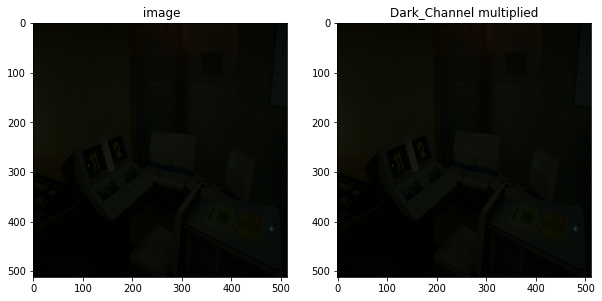

In [22]:
fig=plt.figure(figsize=(10,7))
row,column=1,2

fig.add_subplot(row,column,1)
plt.imshow(image)
plt.title(' image')


fig.add_subplot(row,column,2)
plt.imshow((1-output4D[0])*image)
# plt.gray()
plt.title('Dark_Channel multiplied')

In [3]:
!mkdir low
!mkdir high

In [7]:
img_dir_add="/content/low/"
for img in os.listdir(img_dir_add):
  print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
def dcp_plot(img_dir_add,size):
  img_list=os.listdir(img_dir_add)
  length=len(img_list)

  for i in range(length):
    img_raw=tf.io.read_file(i)
    img=tf.decode_png(img_raw)
    img=tf.convert_image_dtype(img,tf.float32)

    img=tf.reduce_min(img,axis=-1,keepdims=True)
    img=tf.expand_dims(img,axis=0)

    filter=tf.zeros((size,size,1))
    dcp=tf.nn.erosion2d(img,kernel=filter,)